In [1]:
%matplotlib inline

"""
Created on Mon Jul 29 13:26:35 2019

@author: seykia

This script tests HBR models with default configs on toy data.

"""

import os
import numpy as np
from pcntoolkit.normative_model.norm_utils import norm_init
from pcntoolkit.util.utils import simulate_data
import matplotlib.pyplot as plt
from pcntoolkit.normative import estimate
from warnings import filterwarnings
filterwarnings('ignore')


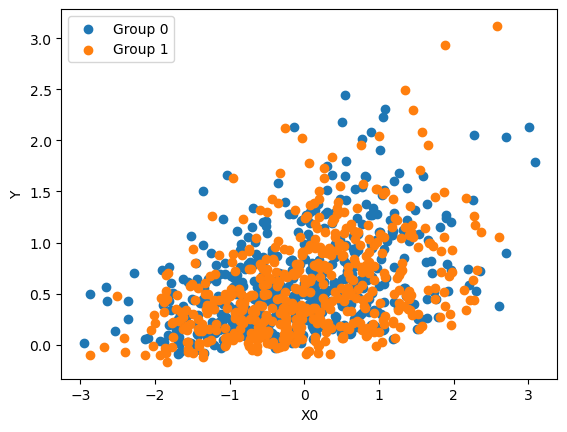

In [2]:



########################### Experiment Settings ###############################


random_state = 29

working_dir = '/home/guus/tmp/'  # Specify a working directory to save data and results.

simulation_method = 'linear'
n_features = 1      # The number of input features of X
n_grps = 2          # Number of batches in data
n_samples = 500     # Number of samples in each group (use a list for different
# sample numbers across different batches)

model_type = 'linear'  # modelto try 'linear, ''polynomial', 'bspline'


############################## Data Simulation ################################


X_train, Y_train, grp_id_train, X_test, Y_test, grp_id_test, coef = \
    simulate_data(simulation_method, n_samples, n_features, n_grps,
                  working_dir=working_dir, plot=True, noise='heteroscedastic_nongaussian',
                  random_state=random_state)



In [4]:

################################# Fittig and Predicting ###############################

nm = norm_init(X_train, Y_train, alg='hbr', model_type=model_type, likelihood='SHASHo',
               linear_sigma='True', random_intercept_mu='True', random_slope_mu='True', linear_epsilon='False', linear_delta='False', nuts_sampler='nutpie')

nm.estimate(X_train, Y_train, trbefile=working_dir+'trbefile.pkl')
yhat, ys2 = nm.predict(X_test, tsbefile=working_dir+'tsbefile.pkl')


################################# Plotting Quantiles ###############################


for i in range(n_features):
    sorted_idx = X_test[:, i].argsort(axis=0).squeeze()
    temp_X = X_test[sorted_idx, i]
    temp_Y = Y_test[sorted_idx,]
    temp_be = grp_id_test[sorted_idx, :].squeeze()
    temp_yhat = yhat[sorted_idx,]
    temp_s2 = ys2[sorted_idx,]

    plt.figure()
    for j in range(n_grps):
        scat1 = plt.scatter(temp_X[temp_be == j,], temp_Y[temp_be == j,],
                            label='Group' + str(j))
        # Showing the quantiles
        resolution = 200
        synth_X = np.linspace(-3, 3, resolution)
        q = nm.get_mcmc_quantiles(
            synth_X, batch_effects=j*np.ones(resolution))
        col = scat1.get_facecolors()[0]
        plt.plot(synth_X, q.T,  linewidth=1, color=col, zorder=0)

    plt.title('Model %s, Feature %d' % (model_type, i))
    plt.legend()
    plt.show()



TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of type(CPUDispatcher(<function careduce_axis at 0x79559b1e3420>)) with parameters (readonly array(float64, 2d, C))
Known signatures:
 * (Array(float64, 2, 'A', False, aligned=True),) -> array(float64, 1d, A)
During: resolving callee type: type(CPUDispatcher(<function careduce_axis at 0x79559b1e3420>))
During: typing of call at /tmp/tmp01rwehf6 (7)


File "../../../../../tmp/tmp01rwehf6", line 7:
def numba_funcified_fgraph(_unconstrained_point, y, batch_effect_0_data, X):
    <source elided>
    # Sum{axis=1}(X)
    tensor_variable_2 = careduce_axis(X)
    ^

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)

During: resolving callee type: type(CPUDispatcher(<function numba_funcified_fgraph at 0x79559d410ea0>))
During: typing of call at /home/guus/anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py (637)


File "../../../anaconda3/envs/dev_215/lib/python3.11/site-packages/nutpie-0.13.2-py3.11-linux-x86_64.egg/nutpie/compile_pymc.py", line 637:
    def extract_shared(x, user_data_):
        <source elided>

        return inner(x, *_shared_tuple)
        ^
